In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df=pd.read_csv("weight-height.csv")

In [102]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [104]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [105]:
df.duplicated().sum()

0

In [106]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [107]:
df.Gender = df.Gender.apply(lambda x: 0 if x=="Female" else 1)

In [108]:
df.Gender.value_counts()

1    5000
0    5000
Name: Gender, dtype: int64

In [109]:
df.Gender.corr(df.Weight)

0.7967233452062232

# EDA Expolarty data anlaysis

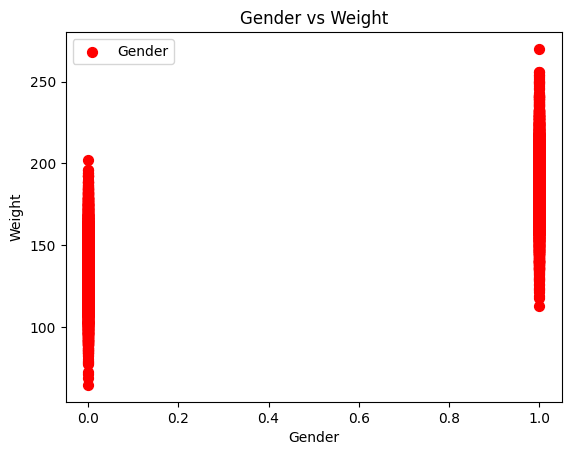

In [110]:
x1=df.iloc[:,0].values
y1=df.iloc[:,2].values
plt.scatter(x1,y1,label="Gender",color="red",s=50)
plt.xlabel("Gender")
plt.ylabel("Weight")
plt.title("Gender vs Weight")
plt.legend()
plt.show()

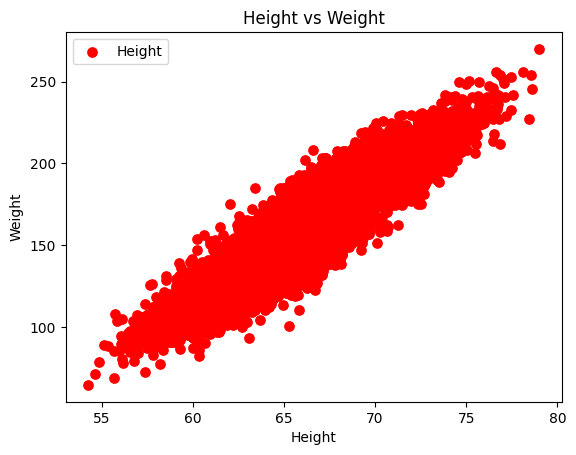

In [111]:
x2=df.iloc[:,1:2].values
y2=df.iloc[:,2].values
plt.scatter(x2,y2,label="Height",color="red",s=45)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.legend()
plt.show()

In [112]:
# Height is highly correleted with Weight 
df.Height.corr(df.Weight)

0.9247562987378065

# Spliting of Dependent and independet Varibles 

In [113]:
# independent Variables
X=df.iloc[:,1:2].values
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [114]:
y=df.iloc[:,2].values
y

array([241.8935632, 162.3104725, 212.7408556, ..., 128.4753188,
       163.8524613, 113.6491027])

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1321)

# import Machine learning model

In [122]:
from sklearn.linear_model import LinearRegression


In [123]:
model=LinearRegression()

In [124]:
import random
random.seed(122435)
random.randint(1,10)

7

In [125]:
model.fit(X_train,y_train)

LinearRegression()

In [126]:
# prediction on Training Data
y_train_pred=model.predict(X_train)

In [128]:
pd.DataFrame({"Orginal Weight":y_train,"Predicted Weight":y_train_pred})

,Orginal Weight,Predicted Weight
0,172.794261,171.947181
1,147.029164,136.865319
2,226.701023,223.526217
3,161.431658,153.409738
4,149.599596,152.788998
...,...,...
7995,178.918714,193.225172
7996,131.395557,145.067915
7997,122.924680,125.777442
7998,141.375098,132.066580


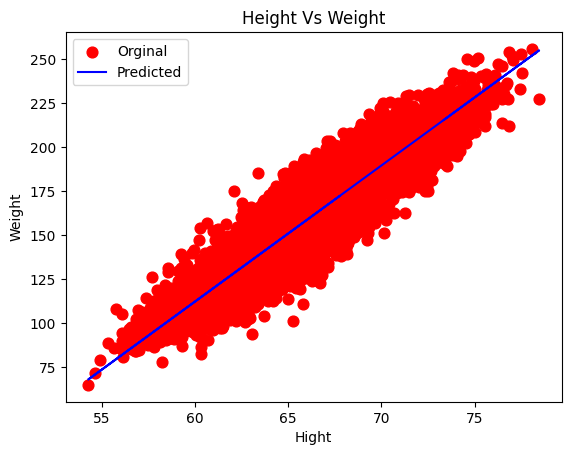

In [130]:
plt.scatter(X_train,y_train,label="Orginal",color="red",s=60)
plt.plot(X_train,y_train_pred,label="Predicted",color="blue")
plt.title("Height Vs Weight")
plt.xlabel("Hight")
plt.ylabel("Weight")
plt.legend()
plt.show()

In [132]:
print("Coffecinet of the mode :",model.coef_)
print("Intercept of the mode :",model.intercept_)

Coffecinet of the mode : [7.73190342]
Intercept of the mode : -351.79070507483266


In [135]:
print("varaince Score :",model.score(X_train,y_train))

varaince Score : 0.8543800481054292


In [137]:
# Prediction on Testing Data
y_test_pred=model.predict(X_test)

In [138]:
pd.DataFrame({"Orginal test":y_test,"Predicted Test":y_test_pred})

,Orginal test,Predicted Test
0,183.936860,184.603609
1,129.001462,137.582434
2,170.191325,169.409373
3,193.217673,168.284992
4,166.390656,169.774674
...,...,...
1995,180.793711,151.553391
1996,192.092449,182.016215
1997,128.091026,136.653387
1998,214.060148,198.983018


In [142]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))

Variance score: 0.86
